**[Data Loading](https://)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder , StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import Ridge, Lasso

In [ ]:

df = pd.read_csv('insurance.csv')

In [ ]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
print(f"Number of row : {df.shape[0]} " )



Number of row : 1338 


In [ ]:
print(f"Number of columns : {df.shape[1]} " )



Number of columns : 7 


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
for i , col in enumerate(df.columns) :
  print (f"{i+1}.{col} - {df[col].dtype} " )


1.age - int64 
2.sex - object 
3.bmi - float64 
4.children - int64 
5.smoker - object 
6.region - object 
7.charges - float64 


**[Data Preprocessing](https://)**

In [ ]:
print (f"Columns : {df.columns.tolist() }" )


Columns : ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [ ]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df['sex'].unique()


array(['female', 'male'], dtype=object)

In [ ]:
df['smoker'].unique()


array(['yes', 'no'], dtype=object)

In [ ]:
df['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

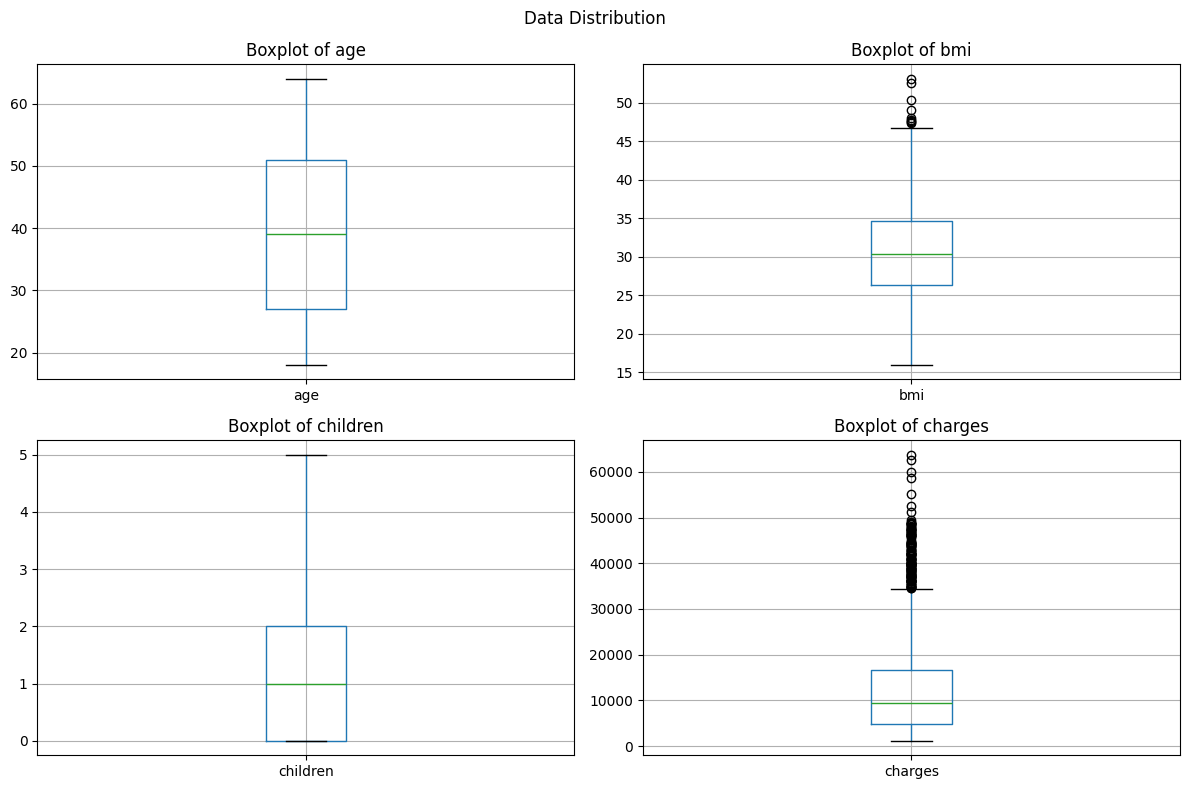

In [ ]:
fig , axes = plt.subplots(2,2, figsize= (12,8 ) )
fig.suptitle("Data Distribution" )
numbers_cols = ['age' , 'bmi' , 'children' , 'charges' ]

for i , col in enumerate(numbers_cols) :
  ax = axes[i//2 , i%2]
  df.boxplot(column=col , ax=ax )
  ax.set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()


In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
print("IQR method is:")
for col in ['bmi', 'charges']:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers detected ({len(outliers)/len(df)*100:.2f}%)")
df_processed = df.copy()
Q1_bmi = df_processed['bmi'].quantile(0.25)
Q3_bmi = df_processed['bmi'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi
df_processed['bmi_capped'] = np.where(
    df_processed['bmi'] > upper_bound_bmi,
    upper_bound_bmi,
    df_processed['bmi']
)
print(f"\nBMI capped at: {upper_bound_bmi:.2f}")
print(f"Original BMI range: [{df['bmi'].min():.2f}, {df['bmi'].max():.2f}]")
print(f"Capped BMI range: [{df_processed['bmi_capped'].min():.2f}, {df_processed['bmi_capped'].max():.2f}]")

IQR method is:
bmi: 9 outliers detected (0.67%)
charges: 139 outliers detected (10.39%)

BMI capped at: 47.29
Original BMI range: [15.96, 53.13]
Capped BMI range: [15.96, 47.29]


In [ ]:
df_processed['age_group'] = pd.cut(df_processed['age'] ,
                                   bins= [17 , 30, 40, 50, 65 ] ,
                                   labels= ['Young Adult' , 'Adult' , 'Middle-aged' , 'Senior' ] )
df_processed['bmi_category'] = pd.cut(df_processed['bmi_capped'],
                                      bins = [0, 18.5, 25,30,100] ,
                                      labels= ['Underweight' , 'Norma' , 'Overweight' , 'Obese' ])
df_processed['smoker_age_interaction'] = df_processed['age'] * (df_processed['smoker'] == 'yes').astype(int)
df_processed['family_size'] = df_processed['children'] + 1
df_processed['charge_per_person'] = df_processed['charges'] / df_processed['family_size']
print(f"1. age_group: {df_processed['age_group'].unique().tolist()}")
print(f"2. smoker_age_interaction: [{df_processed['smoker_age_interaction'].min()}, {df_processed['smoker_age_interaction'].max()}]")
print(f"3. bmi_category: {df_processed['bmi_category'].unique().tolist() } ")
print(f"4. charge_per_person : [{df_processed['charge_per_person'].min():.2f}, {df_processed['charge_per_person'].max():.2f}]")
print(f"5. family_size : [{df_processed['family_size'].min()} , {df_processed['family_size'].max() }]")

1. age_group: ['Young Adult', 'Adult', 'Middle-aged', 'Senior']
2. smoker_age_interaction: [0, 64]
3. bmi_category: ['Overweight', 'Obese', 'Norma', 'Underweight'] 
4. charge_per_person : [768.00, 63770.43]
5. family_size : [1 , 6]


In [ ]:
df_encoded = df_processed.copy()
label_encoder = LabelEncoder()
df_encoded['sex_encoded'] = label_encoder.fit_transform(df_encoded['sex'] )
df_encoded['smoker_encoded'] = label_encoder.fit_transform(df_encoded['smoker'])
print(f"Sex mapping: {dict(zip (label_encoder.classes_ , label_encoder.transform (label_encoder.classes_ )))}")
print(f"Smoker : {dict(zip(label_encoder.classes_, label_encoder.transform (label_encoder.classes_ )))}")
region_dummies = pd.get_dummies(df_encoded['region'] , prefix = 'region' , drop_first=True)
df_encoded = pd.concat([df_encoded , region_dummies] , axis=1 )
print(f"Created columns : {region_dummies.columns.tolist()}")
age_group_mapping = {'Young Adult': 0, 'Adult': 1, 'Middle-aged': 2, 'Senior': 3}
bmi_category_mapping = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df_encoded['age_group_encoded'] = df_encoded['age_group'].map(age_group_mapping)
df_encoded['bmi_category_encoded'] = df_encoded['bmi_category'].map(bmi_category_mapping)
print(f"age_group mapping: {age_group_mapping}")
print(f"bmi_category mapping: {bmi_category_mapping}")

Sex mapping: {'no': np.int64(0), 'yes': np.int64(1)}
Smoker : {'no': np.int64(0), 'yes': np.int64(1)}
Created columns : ['region_northwest', 'region_southeast', 'region_southwest']
age_group mapping: {'Young Adult': 0, 'Adult': 1, 'Middle-aged': 2, 'Senior': 3}
bmi_category mapping: {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}


In [ ]:
numerical_features = ['age', 'bmi_capped', 'children', 'smoker_age_interaction',
                      'family_size', 'charge_per_person']
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])
print("Feature Scaling using StandardScaler (Z-score normalization):")
print("Mean values after scaling (should be close to 0):")
print(df_scaled[numerical_features].mean().round(3))
print("\nStandard deviation after scaling (should be 1):")
print(df_scaled[numerical_features].std().round(3))

Feature Scaling using StandardScaler (Z-score normalization):
Mean values after scaling (should be close to 0):
age                      -0.0
bmi_capped               -0.0
children                 -0.0
smoker_age_interaction   -0.0
family_size              -0.0
charge_per_person         0.0
dtype: float64

Standard deviation after scaling (should be 1):
age                       1.0
bmi_capped                1.0
children                  1.0
smoker_age_interaction    1.0
family_size               1.0
charge_per_person         1.0
dtype: float64


**[ Pipeline Creation ](https://)**

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
numerical_cols = ['age', 'bmi', 'children']
categorical_cols = ['sex', 'smoker', 'region']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
ml_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    ))
])
ml_pipeline.fit(X_train, y_train)
y_pred = ml_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.4f}")
if hasattr(ml_pipeline.named_steps['regressor'], 'feature_importances_'):
    preprocessor = ml_pipeline.named_steps['preprocessor']
    feature_names = []
    feature_names.extend(numerical_cols)
    encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
    categorical_features = encoder.get_feature_names_out(categorical_cols)
    feature_names.extend(categorical_features)
    importances = ml_pipeline.named_steps['regressor'].feature_importances_
    for name, importance in zip(feature_names, importances):
        print(f"{name}: {importance:.4f}")
joblib.dump(ml_pipeline, 'insurance_pipeline.pkl')
example_data = pd.DataFrame({
    'age': [30],
    'sex': ['male'],
    'bmi': [28.5],
    'children': [2],
    'smoker': ['no'],
    'region': ['southeast']
})

Mean Squared Error (MSE): 19575065.33
Root Mean Squared Error (RMSE): 4424.37
Mean Absolute Error (MAE): 2437.18
R-squared (R²): 0.8739
age: 0.1310
bmi: 0.2014
children: 0.0134
sex_female: 0.0020
sex_male: 0.0019
smoker_no: 0.4740
smoker_yes: 0.1651
region_northeast: 0.0040
region_northwest: 0.0031
region_southeast: 0.0023
region_southwest: 0.0018


**[Primary Model Selection](https://)**

In [ ]:
print(f"  Mean: {df['charges'].mean():.2f}")
print(f"  Median: {df['charges'].median():.2f}")
print(f"  Std: {df['charges'].std():.2f}")
print(f"  Min: {df['charges'].min():.2f}")
print(f"  Max: {df['charges'].max():.2f}")

  Mean: 13270.42
  Median: 9382.03
  Std: 12110.01
  Min: 1121.87
  Max: 63770.43


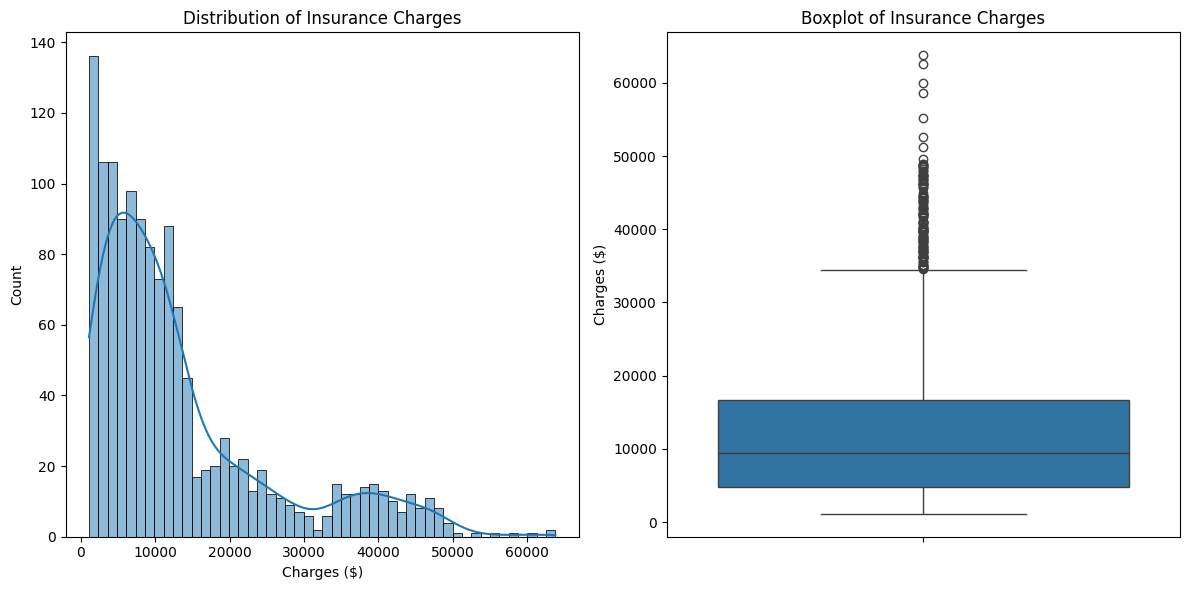

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['charges'], bins=50, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges ($)')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['charges'])
plt.title('Boxplot of Insurance Charges')
plt.ylabel('Charges ($)')
plt.tight_layout()
plt.show()

In [ ]:
numerical_cols = ['age', 'bmi', 'children', 'charges']
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


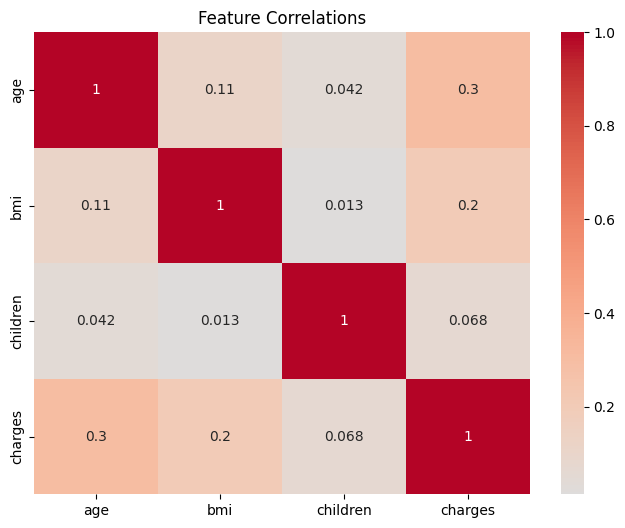

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations')
plt.show()

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True )
print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (1070, 6)
Test set size: (268, 6)


In [ ]:
print("GRADIENT BOOSTING PERFORMANCE:")
print(f"R² Score: {r2_gb:.4f}")
print(f"RMSE: ${rmse_gb:.2f}")
print(f"MAE: ${mae_gb:.2f}")
print(f"Cross-validation R²: {cv_scores_gb.mean():.4f} (±{cv_scores_gb.std():.4f})")

GRADIENT BOOSTING PERFORMANCE:
R² Score: 0.8694
RMSE: $4502.32
MAE: $2483.95
Cross-validation R²: 0.8350 (±0.0437)


In [ ]:
preprocessor = gb_pipeline.named_steps['preprocessor']
feature_names = []
feature_names.extend(numerical_cols)
encoder = preprocessor.named_transformers_['cat']
categorical_features = encoder.get_feature_names_out(categorical_cols)
feature_names.extend(categorical_features)
importances = gb_pipeline.named_steps['regressor'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10).to_string(index=False))


Top 10 Most Important Features:
         Feature  Importance
      smoker_yes    0.642766
             bmi    0.205538
             age    0.126225
        children    0.014487
region_southwest    0.003482
region_northwest    0.002797
        sex_male    0.002424
region_southeast    0.002282


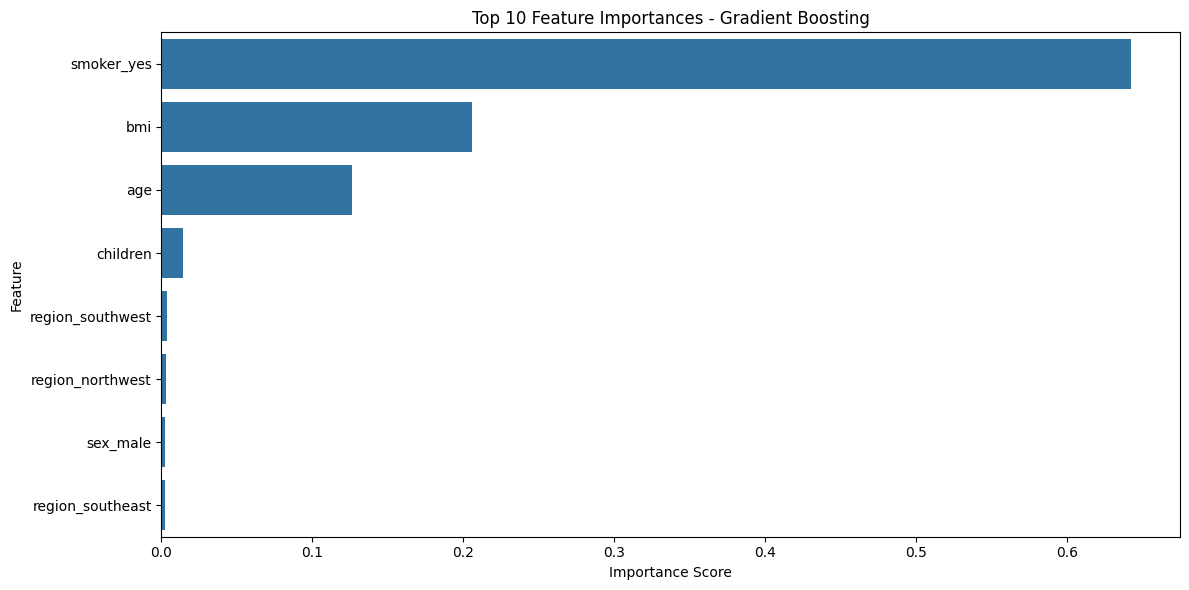

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances - Gradient Boosting')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

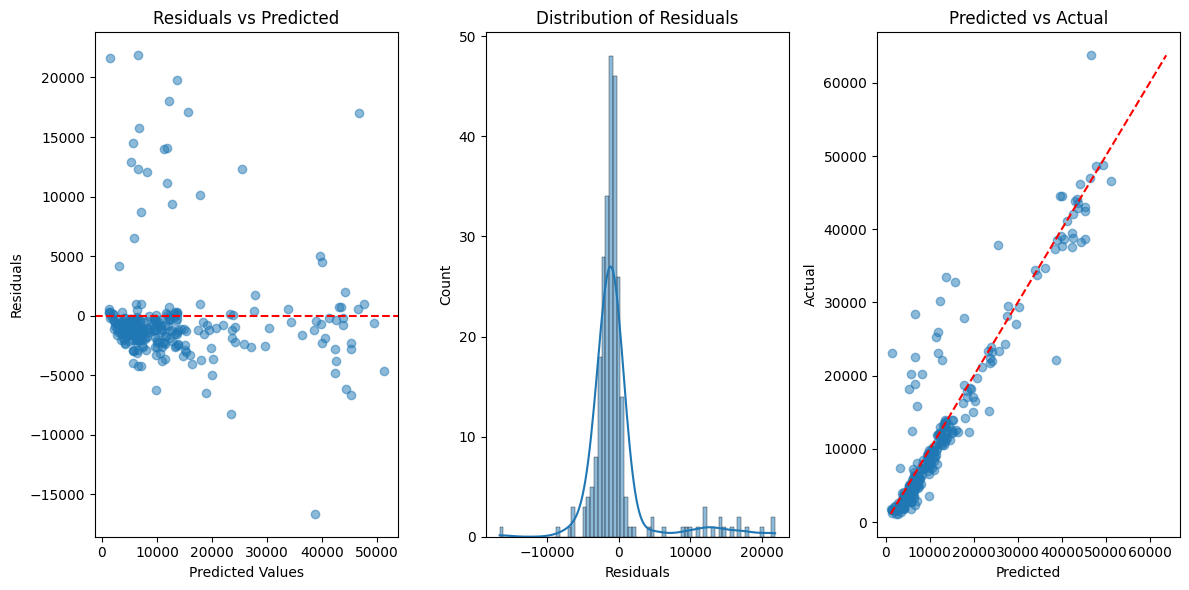

In [ ]:
residuals = y_test - y_pred_gb
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_pred_gb, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.subplot(1, 3, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.subplot(1, 3, 3)
plt.scatter(y_pred_gb, y_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs Actual')
plt.tight_layout()
plt.show()

**[Model Training](https://)**

In [ ]:
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
X = df.drop('charges', axis=1)
y = df['charges']
X = pd.get_dummies(X)  # Automatically convert text to numbers
model = RandomForestRegressor()
model.fit(X, y)
score = model.score(X, y)
print(f"Model accuracy: {score:.2%}")

Model accuracy: 85.38%


**[Cross-Validation](https://)**

In [ ]:
data['sex'] = data['sex'].map({'female': 0, 'male': 1})
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})
data['region'] = pd.factorize(data['region'])[0]
X = data.drop('charges', axis=1)
y = data['charges']
model = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(model, X, y,
                           cv=5,  # 5 folds
                           scoring='r2')
print(f"cross-validation: {cv_scores.round(3)}")
print(f"Average R²: {cv_scores.mean():.3f}")
print(f"Standard deviation: {cv_scores.std():.3f}")
print(f"Range: {cv_scores.min():.3f} to {cv_scores.max():.3f}")

cross-validation: [-0.03  -0.114 -0.103 -0.011  0.01 ]
Average R²: -0.050
Standard deviation: 0.050
Range: -0.114 to 0.010


**[Hyperparameter Tuning](https://)**

In [ ]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features) ])
baseline_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))  ])
baseline_model.fit(X_train, y_train)
y_pred_baseline = baseline_model.predict(X_test)
print(f"Baseline R²: {r2_score(y_test, y_pred_baseline):.4f}")
print(f"Baseline MAE: {mean_absolute_error(y_test, y_pred_baseline):.2f}")
print(f"Baseline RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_baseline)):.2f}")
param_grid_rf = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, 30, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt'] }
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42)) ])
grid_search_rf = GridSearchCV(
    rf_pipeline,
    param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1 )
grid_search_rf.fit(X_train, y_train)
print(f"\nBest RF Parameters: ")
print(f"Best CV R²: ")
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print(f"Best RF Parameters: {grid_search_rf.best_params_}")
print(f"Best CV R²: {grid_search_rf.best_score_:.4f}")
param_dist_gb = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__max_depth': [3, 4, 5, 6, 7],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__subsample': [0.8, 0.9, 1.0] }
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))  ])
random_search_gb = RandomizedSearchCV(
    gb_pipeline,
    param_dist_gb,
    n_iter=50,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1 )
random_search_gb.fit(X_train, y_train)
print(f"\nBest Parameters: ")
print(f"Best CV R²: ")
best_gb_model = random_search_gb.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
print(f"Best GB Parameters: {random_search_gb.best_params_}")
print(f"Best CV R²: {random_search_gb.best_score_:.4f}")
models = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'regressor__n_estimators': [100, 200, 300],
            'regressor__max_depth': [10, 20, 30],
            'regressor__min_samples_split': [2, 5] } },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'regressor__n_estimators': [100, 200],
            'regressor__learning_rate': [0.05, 0.1],
            'regressor__max_depth': [3, 4] } },
    'Ridge': {
        'model': Ridge(random_state=42),
        'params': {'regressor__alpha': [0.1, 1.0, 10.0]} },
    'Lasso': {
        'model': Lasso(random_state=42),
        'params': {'regressor__alpha': [0.1, 1.0, 10.0]}  }}
results = []
for model_name, model_info in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model_info['model']) ])
    grid_search = GridSearchCV(
        pipeline,
        model_info['params'],
        cv=5,
        scoring='r2',
        n_jobs=-1,
        verbose=0 )
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    results.append({
    'Model': model_name,
    'Best Parameters': grid_search.best_params_,
    'CV R²': grid_search.best_score_,
    'Test R²': r2_score(y_test, y_pred),
    'Test RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
})
best_rf_params = {k.replace('regressor__', ''): v for k, v in grid_search_rf.best_params_.items()}
best_gb_params = {k.replace('regressor__', ''): v for k, v in random_search_gb.best_params_.items()}
ensemble_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', VotingRegressor([
        ('rf', RandomForestRegressor(**best_rf_params, random_state=42)),
        ('gb', GradientBoostingRegressor(**best_gb_params, random_state=42))  ]))  ])
ensemble_pipeline.fit(X_train, y_train)
y_pred_ensemble = ensemble_pipeline.predict(X_test)
print(f"Ensemble Model R²: {r2_score(y_test, y_pred_ensemble):.4f}")
print(f"Ensemble Model MAE: {mean_absolute_error(y_test, y_pred_ensemble):.2f}")
print(f"Ensemble Model RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ensemble)):.2f}")
final_comparison = pd.DataFrame({
    'Model': ['Baseline RF', 'Optimized RF', 'Optimized GB', 'Ensemble'],
    'Test R²': [
        r2_score(y_test, y_pred_baseline),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_gb),
        r2_score(y_test, y_pred_ensemble) ],
    'Test RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_baseline)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf)),
        np.sqrt(mean_squared_error(y_test, y_pred_gb)),
        np.sqrt(mean_squared_error(y_test, y_pred_ensemble)) ],
    'Improvement (%)': [
        0,
        ((r2_score(y_test, y_pred_rf) - r2_score(y_test, y_pred_baseline)) / r2_score(y_test, y_pred_baseline)) * 100,
        ((r2_score(y_test, y_pred_gb) - r2_score(y_test, y_pred_baseline)) / r2_score(y_test, y_pred_baseline)) * 100,
        ((r2_score(y_test, y_pred_ensemble) - r2_score(y_test, y_pred_baseline)) / r2_score(y_test, y_pred_baseline)) * 100  ]  })
print(final_comparison.to_string(index=False))

Baseline R²: 0.8656
Baseline MAE: 2543.98
Baseline RMSE: 4567.78
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Best RF Parameters: 
Best CV R²: 
Best RF Parameters: {'regressor__max_depth': 10, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 5, 'regressor__n_estimators': 300}
Best CV R²: 0.8254
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best Parameters: 
Best CV R²: 
Best GB Parameters: {'regressor__subsample': 1.0, 'regressor__n_estimators': 300, 'regressor__min_samples_split': 2, 'regressor__min_samples_leaf': 4, 'regressor__max_depth': 4, 'regressor__learning_rate': 0.01}
Best CV R²: 0.8456
Ensemble Model R²: 0.8685
Ensemble Model MAE: 2817.26
Ensemble Model RMSE: 4518.32
       Model  Test R²   Test RMSE  Improvement (%)
 Baseline RF 0.865606 4567.775116         0.000000
Optimized RF 0.852427 4786.486506        -1.522414
Optimized GB 0.874262 4418.211353         1.000101
    Ensemble 0.86850

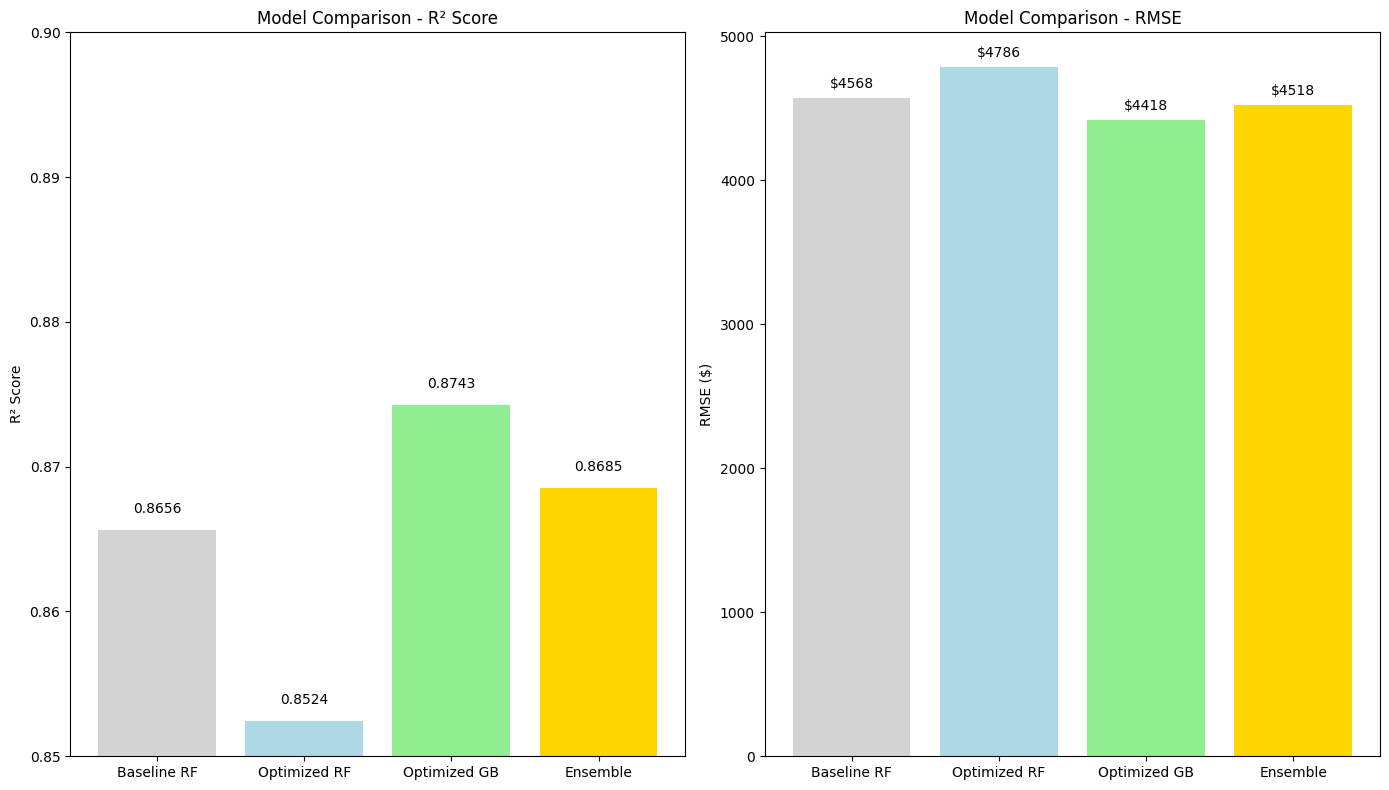

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 8))
models_list = final_comparison['Model']
r2_scores = final_comparison['Test R²']
bars1 = axes[0].bar(models_list, r2_scores, color=['lightgray', 'lightblue', 'lightgreen', 'gold'])
axes[0].set_title('Model Comparison - R² Score')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim(0.85, 0.90)
for bar, score in zip(bars1, r2_scores):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                f'{score:.4f}', ha='center', va='bottom')
rmse_scores = final_comparison['Test RMSE']
bars2 = axes[1].bar(models_list, rmse_scores, color=['lightgray', 'lightblue', 'lightgreen', 'gold'])
axes[1].set_title('Model Comparison - RMSE')
axes[1].set_ylabel('RMSE ($)')
for bar, score in zip(bars2, rmse_scores):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                f'${score:.0f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

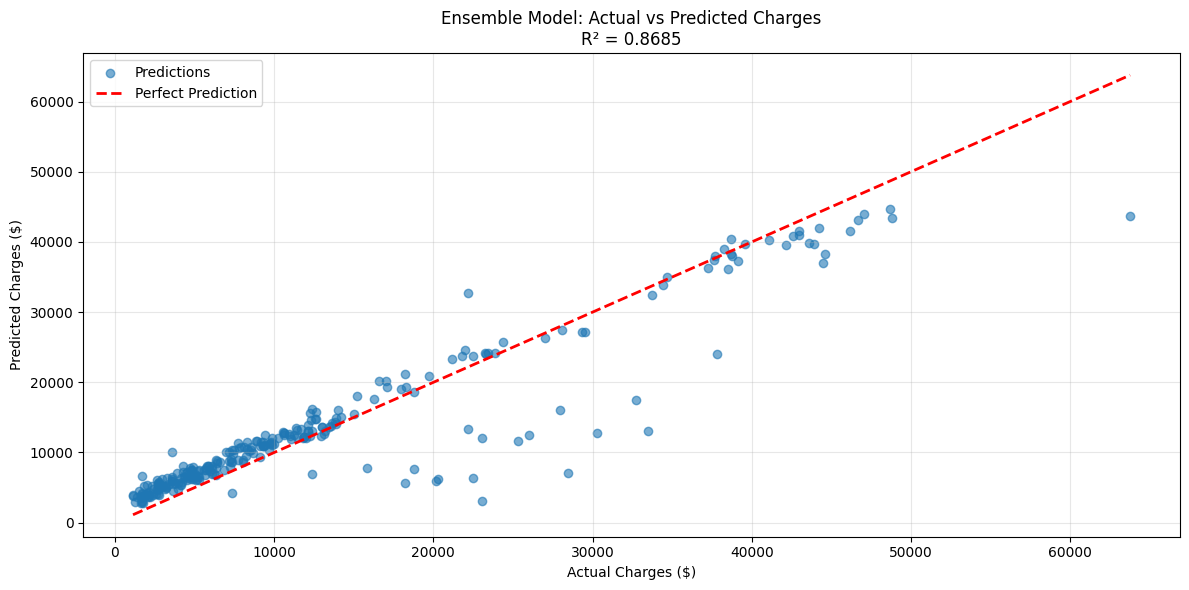

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_ensemble, alpha=0.6, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Charges ($)')
plt.ylabel('Predicted Charges ($)')
plt.title(f'Ensemble Model: Actual vs Predicted Charges\nR² = {r2_score(y_test, y_pred_ensemble):.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**[Best Model Selection ](https://)**

In [ ]:

best_index = final_comparison['Test R²'].idxmax()
best_model_row = final_comparison.loc[best_index]
print(f"Best Model        : {best_model_row['Model']}")
print(f"Best Test R²      : {best_model_row['Test R²']:.4f}")
print(f"Best Test RMSE    : {best_model_row['Test RMSE']:.2f}")
print(f"Improvement (%)   : {best_model_row['Improvement (%)']:.2f}%")


Best Model        : Optimized GB
Best Test R²      : 0.8743
Best Test RMSE    : 4418.21
Improvement (%)   : 1.00%


**[Model Performance Evaluation](https://)**

In [ ]:
y_test_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"R² Score : {r2:.4f}")
print(f"Mean Absolute Error : {mae:.2f}")
print(f"Root Mean Squared Error : {rmse:.2f}")

R² Score : 0.8717
Mean Absolute Error : 2553.33
Root Mean Squared Error : 4463.86


**[Web Interface with Gradio ](https://)**

In [ ]:
import torch
print("GPU 🟢" if torch.cuda.is_available() else "CPU 🟢")

GPU 🟢


In [ ]:
# [13] Clone the Edge-TTS repository from HuggingFace
!git clone https://huggingface.co/spaces/Mahin123456/Mahinu11

Cloning into 'Mahinu11'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 19 (delta 5), reused 0 (delta 0), pack-reused 4 (from 1)
Unpacking objects: 100% (19/19), 8.25 KiB | 2.06 MiB/s, done.


In [ ]:
%cd Mahinu11

[Errno 2] No such file or directory: 'Mahinu11'
/content/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11


In [ ]:
# Check the current working directory
!pwd

/content/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11


In [ ]:
# List the contents of the /content directory
!ls -F /content

insurance.csv  m/  mahi/  Mahinu11/  sample_data/


In [ ]:
# Recursively list the contents of the cloned Mahinu11 directory
!ls -RF /content/Mahinu11

/content/Mahinu11:
Mahinu11/

/content/Mahinu11/Mahinu11:
App.py	Mahinu11/  README.md

/content/Mahinu11/Mahinu11/Mahinu11:
Mahinu11/  README.md  requirements.txt

/content/Mahinu11/Mahinu11/Mahinu11/Mahinu11:
Mahinu11/  README.md  requirements.txt

/content/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11:
App.py	best_insurance_model.pkl  README.md  requirements.txt


In [ ]:
! pip install -r requirements.txt -q

In [ ]:
!python App.py

Starting Insurance Prediction App...
Current directory: /content/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11/Mahinu11
Available files: ['.gitattributes', 'requirements.txt', 'insurance.pkl', 'App.py', 'README.md', '.git']
insurance_pipeline.pkl not found, searching for other model files...
Found pickle files: ['insurance.pkl']
Error loading model: 
Creating a fallback model...

Launching Gradio Interface...

* Running on local URL:  http://0.0.0.0:7860
* Running on public URL: https://2a86e621b5edf41f43.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
